# Overview

This week is about two topics. Decision trees and clustering. The main exercise will be on decision trees, and we'll also talk a bit about unbalanced data sets as well as a little exercise on clustering, an example of unsupervised learning. Before we get started, we'll talk about workload, however. 

## Part 0: Discussing the course workload

Last week we talked about what could be better with the class and some of you guys mentioned that parts of the class are a lot of work. So this week we'll start an investigtion of that. Below, I'm including a Google form to collect some data on the matter. I ask a few additional questions because I want to understand how your background plays influences the answers. 

I'll do an analysis of your answers and tell you about the findings next week.

In [1]:
from IPython.display import IFrame, YouTubeVideo
IFrame("https://docs.google.com/forms/d/1VsgNpMMQk-sZoZD2pxeXmKFXfnhZ0EGwvQ3YDNZbGwA/viewform?embedded=true", 
       width=600, height=400)

# I'm not showing the entire questionnaire in the iframe below, but you should be able to scroll within the frame.

## Part 1: Decision trees (DSFS Chapter 17)

> _Reading I_: The visual introduction to decision trees on [**this webpage**](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
) is AMAZING. Take a look to get an intuitive feel for how trees work. Do not miss this one, it's a treat!

---

> _Reading II_: DSFS Chapter 17. Work through chapter 17 of the book. It's not as flashy as the fancy `D3.js` based web-explanation, but it's very good (in my humble opinion).

In [2]:
# Ole explains decision trees
YouTubeVideo("LAA_CnkAEx8",width=600, height=338)

> _Exercises_: Just a few questions to make sure you've read the text and/or watched the video.
>
> * There are two main kinds of decision trees depending on the type of output (numeric vs. categorical). What are they?
> * Explain in your own words: Why is _entropy_ useful when deciding where to split the data?
> * Why are trees prone to [overfitting](https://www.youtube.com/watch?v=DQWI1kvmwRg)?
> * Explain (in your own words) how random forests help prevent overfitting.

Chief Suneman arrives at work one day and immediately starts motivating the team by randomly yelling at everyone in order to increase morale - something like [this](https://www.youtube.com/watch?v=L_QCioSGgwU). After a while, the team gets him calmed down with a cup of coffee and a movie. It doesn't help, after watching the first 10 minutes (see below) he comes out of his office with an outrageous request for the newly appointed data science team

In [3]:
YouTubeVideo("BmSarhudhiY",width=600, height=300)

In [4]:
import csv 
import numpy as np

# get the csv reader
infile = open("/Users/stefano_savian/Desktop/social data analysis/Week3/SFPD_Incidents_-_from_1_January_2003.csv", 'r')
data = csv.reader(infile, delimiter = ',')
# crime table  fields

IncidntNum = []; Category =[]; Descript = []; DayOfWeek = []; Date = []; Time = [];
PdDistrict = []; Resolution = []; Address = [];X = []; Y = []; Location = []; PdId = [];

cat_dist = {}
crimelist = []
for row in data:
    cat_dist = {'Category' : row[1],'PdDistrict': row[6],'Day': row[3], 'Time': row[5], 'Loc': row[11]}    
    #tdate = {'time': row[5], 'Date': row[4]}   
    crimelist.append(cat_dist)


## Part 2: Clustering (DSFS Chapter 19)

Clustering is an important _unsupervised_ method to reveal structure in the data. You've already done a lot of hard work today, so let's make this one as easy as possible.

> _Reading_: Check out chapter 19 of DSFS

In [77]:
# Ole talks about clustering
YouTubeVideo("G7jYVrCVygU",width=600, height=338)

In this exercise we explore $K$-means clustering - and we it out on the locations of the `PROSTITUTION` crime type. Applying a clustering method makes sense because we know from our earlier work that this crime type tends to happen in only a few locations. We'll also talk a little bit about model selection and [overfitting](https://www.youtube.com/watch?v=DQWI1kvmwRg) in unsupervised models.

> _Exercise_: $K$-means
> 
> * Visualize the prostitution data (e.g. by plotting it on a map)
> * Train models of $K = 2,\ldots,10$ on the prostitution data.
> * Explore how the total squared error changes as a function of $K$ and identify what you think is the right number of clusers based on the knee-point in the squared error plot.
> * And by the way: The fit only gets better when we add more means - why not keep adding more of them: Explain in your own words why it makes sense to stop around a knee-point.
> * Another way of estimating the right number of clusters in a $K$-means problem is _stability analysis_. The idea is the following
>   - For each $K = 2,\ldots,10$ generate $N = 10$ clusterings based on random 50% of data (or some other fraction of data/bootstrap).
>   - Calculate the pairwise similarity between the clusterings. 
>   - We now define _stability_ for some value of $K$ as average pairwise similarity of the $N$ clustering, where the similarity is the cosine distance $\frac{\mathbf{c}_i^K\cdot\mathbf{c}_j^K}{||\mathbf{c}_i^K||\,||\mathbf{c}_j^K||}$ between centroid vectors $\mathbf{c}_i^K$ and $\mathbf{c}_j^K$.
>   - We now say that the right $K$ maximizes stability.
> * Explain why stability should help you find the right number of clusters.
> * **Optional**: Perform stability analysis on the prostitution data. 

In [7]:
def prost(a):
    if a.get('Category') =='PROSTITUTION':
        return a.get('Loc')
    else:
        return -1
locations = np.array(map(lambda x: prost(x), crimelist))
Loc =np.delete(locations,0)
Loc1 = np.array(filter(lambda x: x!='-1', locations))

In [75]:
Lat = map(lambda x: float(x.split(",")[0][1:]), Loc1)
Lon = map(lambda x: float(x[1:-2].split(",")[1]), Loc1)

In [10]:
import geoplotlib 
from geoplotlib.utils import BoundingBox
prost = {"lat":Lat,"lon":Lon1}
bbox = BoundingBox(north=37.739997549229, west= -122.471348123944,
                   south=37.710767295435, east= -122.20348123944)
geoplotlib.kde(prost, bw=2, cut_below=1e-4 )
geoplotlib.set_bbox(bbox)
geoplotlib.inline()

('smallest non-zero count', 8.955579620337621e-09)
('max count:', 63.281275234669415)


In [49]:
from sklearn.cluster import KMeans 
from scipy.cluster.vq import vq, whiten

In [127]:
features = zip(Lat,Lon)
features = filter(lambda x: x[0] != 90 and x[1]!= -120.5 ,features)
sqrd_err = []
for k in range(2,10):
    KM = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300,
                            tol=0.0001, precompute_distances='auto', verbose=0, random_state=None,
                            copy_x=True, n_jobs=1)
    KM.fit(features)
    sqrd_err.append(KM.inertia_)

[2.0923848786701877, 0.80604759195163656, 0.6352305851316542, 0.51425296896988892, 0.45734583785728777, 0.37446761988515026, 0.33993370777591192, 0.30526535497752089]


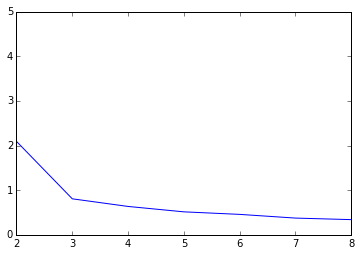

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
print sqrd_err
plt.plot(range(2,10), sqrd_err)
plt.axis([2, 8, 0, 5])
plt.show()

The fits gets better when incresing the number of centroids, but at the same time it looses signficance because centroids carry less information.

In [128]:
features = np.array(features)


In [122]:
centroids=[]
for k in range(2,11):
    centroids.append([])
    for i in range(10):
        random_data = np.random.choice(len(features), int(len(features) * 0.5), replace=False)
        KM = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300,
                            tol=0.0001, precompute_distances='auto', verbose=0, random_state=None,
                            copy_x=True, n_jobs=1)
        KM.fit(features[random_data])
        centroids[k-2].append(KM.cluster_centers_)
        


8 0.991546910536
[0.9765379068184471, 0.98175148956166325, 0.98459276008776797, 0.99060484945986682, 0.99021662837106406, 0.98849891261765122, 0.98972819463616468, 0.98956509259243819, 0.99154691053614508]


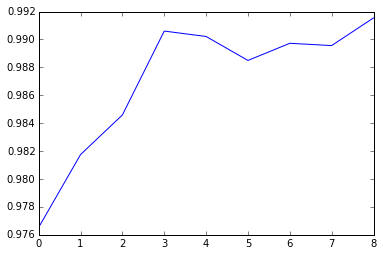

In [170]:
from scipy import linalg, mat, dot
from sklearn.metrics import pairwise_distances
#print centroids[0]
stabilities = []
for k in range(2,11):
    centroids_k = centroids[k-2]
    cluster_similarites = []
    for i in range(10):
        centers = centroids_k[i]
        similarity = 1 - pairwise_distances(centers, metric="cosine")
        cluster_similarites.append(np.sum(similarity)/(np.size(similarity-k)))
    stabilities.append(sum(cluster_similarites)/len(cluster_similarites))
    
import operator
min_index, min_value = max(enumerate(stabilities), key=operator.itemgetter(1))
print min_index, min_value
print stabilities
plt.plot(stabilities)
plt.show()

In [148]:
a = np.array([37.78736409, -122.41781694])
b = np.array([37.76058883, -122.41828539]) 
dot(a,b.T)/linalg.norm(a)/linalg.norm(b)
help(linalg.norm)

Help on function norm in module scipy.linalg.misc:

norm(a, ord=None)
    Matrix or vector norm.
    
    This function is able to return one of seven different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : (M,) or (M, N) array_like
        Input array.
    ord : {non-zero int, inf, -inf, 'fro'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object.
    
    Returns
    -------
    norm : float
        Norm of the matrix or vector.
    
    Notes
    -----
    For values of ``ord <= 0``, the result is, strictly speaking, not a
    mathematical 'norm', but it may still be useful for various numerical
    purposes.
    
    The following norms can be calculated:
    
    =====  ============================  ==========================
    ord    norm for matrices             norm for vectors
    =====  =======

In [166]:

np.sum(pairwise_distances(centers, metric="cosine"))/(np.size(pairwise_distances(centers, metric="cosine"))-10)

0.011739990611225748